In [1]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim
# @pyimport mpl_toolkits

In [2]:
function record_snapshot(A, ims)
    """Saves figure snapshot for the final animation"""
    im = imshow(copy(A), interpolation="nearest",
    extent=(0.5,size(A,1)+0.5,size(A,2)+0.5,0.5))
    clim(-1,1)
    push!(ims, PyCall.PyObject[im])
end    

function house(x)
    """Computes the Householder transformation for input vector x"""
    sigma = dot(x[2:end],x[2:end])
    v = copy(x)
    v[1] = 1
    if sigma == 0 && x[1] >= 0
        beta = 0
    elseif sigma == 0 && x[1] < 0
        beta = -2
    else
        mu = sqrt(x[1]*x[1] + sigma)
        if x[1] <= 0
            v[1] = x[1] - mu
        else
            v[1] = -sigma / (x[1] + mu)
        end            

        beta = 2 * v[1] * v[1] / (sigma + v[1]*v[1])
        v /= v[1]
    end

    return (v, beta)
end 

house (generic function with 1 method)

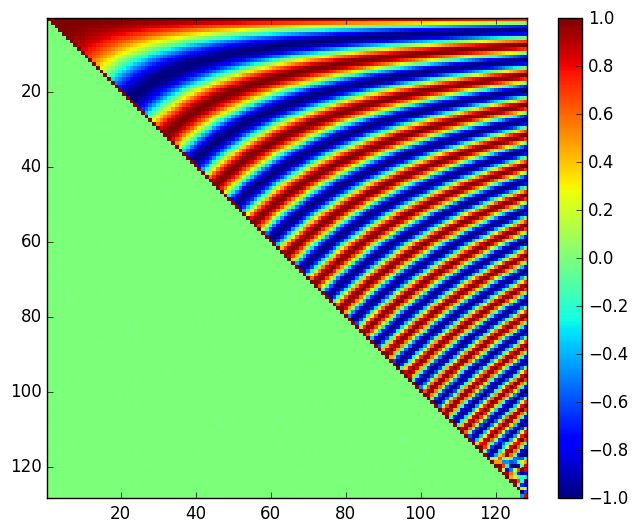

In [3]:
# Initialize matrix
n = 128
R = zeros(n,n)
for i=1:n
    R[i,i] = 1
    for j=i+1:n
        R[i,j] = cos( (pi*i*j) / (4*n) )
    end
end
Q = rand(n,n); Q, = qr(Q)
A = Q*R

fig = figure()
ims = []
record_snapshot(A, ims)

# Apply sequence of Householder transformations
for k=1:n-2
    v, beta = house(A[k:end,k])
    A[k:end,k:end] = A[k:end,k:end] - beta * v * (v' * A[k:end,k:end])
    record_snapshot(A, ims) # This is used to make the movie at the end
end            

colorbar()
ani = anim.ArtistAnimation(fig, ims, interval=100, blit=true)
ani[:save]("QR.mp4", extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

In [4]:
# call function to display the animation
display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
        base64encode(open(readbytes,"QR.mp4")),"""" type="video/mp4"></video>"""));

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAYGfNtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE0OCByMjY2OCBmZDJjMzI0IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxNiAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTEwIHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAFgsGWIhAAQ//73gb8yy18iuslx+ed9LKzPPOQ8cl2JrrjQAAADAAADAAADACLCsOxfhRzOajoAAAMAB6ABfEgbA/+wfojApMcXHPzacaPWoJcEXhTtKtCbUYBnQTCCEaDrTkhCgfIZbMXIag28NK042mXnD4PFtQ1oX56/XM/LdTczsEpugSHglvNMdi+TAjR++Y6+sRs4z9Q3Pyf3oS+5ORQi5SKT7VUN6qGrYlmq6fhyJV+ApXqI4nZHu86uSVQndkTtg4Kq/T/qhpaQUo77vgPO2+YMhCe/wZEI5i/9mn8kZ1vlzyiStSaK1Gbo5g+o/in8aQA6sqhWfYN3Pz4MxpwccBB+HPLZeeOdUmHc+OsM/WEwDS3KyNAkq097gQp/BtB7YMUuZTBn13becxRVt6oy54Eh1H3cIf8r6MH9LmBn5uwHcP+phDlrJCuwc/Bt28+PdpUxJUZVRsvJHgEVn246huTXn9h0mI1Whqhqgz8RUgKQJ1XEj9/hA7P5Tol2XOageNfKxMqtqV+Pc2yVdri+Thj3sRxM9VM0hpAyZlJlJIwSCKJ45q09rJfr8Bi5RLFsQ0x7LSUjUMHbL8j7wSkeirtBpp+NXbJXsWWJaTc6rpVI0vk8Ibt3sflWBgVKmDiJR7+biIaLMmnrdxA3x+cS8fCW7+fQRbbjHs1mUjs+VvzPYDNix1CIvVwFJ/PQGrV3Jtr2ZdaauMXInmnhB3CvoskmbFi29Pv4rQ3a3gzvEWbvrksJ4HmBoymy6tKgrVbHjJNYimPPv95lJplSimhTHe4yMCBJ+soLufHBQ3naz7n4d+N9+DL8WwdogfHLp6i81jbvy/CJ/gU2lnFHu49tFrddWX7M11tjt/IeGdZgeniICW0aCfV2aEfpQ1mDoqeBiDEgkxNICOAswJgzunIQ87Q0wZMCYZge1+HXiu8UJUZRGdxpI4GiTvn5sL9atWecdbqwAd/39CKvfU6jC2AsmCcjh0kpYH4li37l3JXnwdyzial7GRHcIhFUGoEnhperZrEOXMNaUxeaHVFzFru9oEL1gBAOa9bZLv/zIDFdZzZfXkZBZ65UX4Pydm6Q8T0WkbcFFu19HEdvv4AnDodnixQDBxNWNE9W+K+2r0DHJ5+chwkUpYXodgUA/UCJ10k35pan7YsMb7aazHfwAb6plJpEEnN1I5j0T7AzfW1CYlayEs9avRpgc9NvprPtLSqifksEIr90tgg80JmhmjkkMJQDNXFQm1vh2eTUmr0hNOofBWSD9GJNzf2nJJVxpsMqbrf8YGRAw+BoPqOLsUcS0gkxLzL9h+FLHk+XN4jdcDhsqnEL6FWpIAtH1Rk09dZMrWILicfa8kgCdqmXru/Cl8oXB+CGZQFI8ji0gVHuwCdiOI00uyML/0xiO2k2dxs52RamQ+Gscm6O6MNEOhlxP/VODRf9/ceUJ1hX9JnAQF/cqE+vOAM1DMhOXLctlk5jl5Mp6wA523rbUr7oe68OtkllVTgtoOopDQMzAo9ll3xO19ixOzPO7WzsaW4vXQlyWHzWyVarGi7zZ8HNvNkOL1sV21FwGOHk6M4iVNS0kF+jfOWonfvquwPG15ug9uzaOqGPVXMSmSWS2DBKC2gAZ/9sGV344+HzPprnp1nfBKEgLNzf0bP64KCGkCsYD8zNsM7T9jbIpuiWSck2JMZEXjud+UzT5uybp/L7hbpTvsJKniujmhCBaLjzW81/aHLOGulYg7rmUHRzQ2aQicMU8cVDiGT2vTRt+JNkfq2SNx6aT2APnHs0ZRIWVwuALfwe1vi98oyYUYf6iMNEU83J6z4T4VyWCCzxq/rxkHacrMAvufhqt9n028C1do1yoAv2WezSRHyzfsrRnO6fq9IWz+lVzigNt01Dt6Z/ZA1I68WdpHyV5YlNsmIX34ASVQrwN56Igx7ZN7zAoDfN8QnjnRWZbKiIlifcmuXfL3wrcK04iIz58CQrYciEH9zupjqth442KcFnNyHGryxlgcD3jjGH8FJ2DfL4RWXqGHxhzuW6UKNJaUlP9B/s5MnvoiPkMc7bRg01v5eNmZXBvi/X7dA6w8qE9m9M34xrMSirhR7SqL32AQ7lLvVeMove1ZD94UDPdW9FfMuZJtD+vwR2M2N3n09QdBOJHT4fpDlsYVONWV9E3/N9Du86CVnn54jOXy7ZrLSHPLgX7boqg9D9RGoFyx6uNKQDd1mqXMEHQL6mbydCU1CuAjtL/hswu0zcbEI7RrgdTmgQqw/oa8NUuJ5RLaOwBx+YkfPvVuzEhU/SHECYRzzLpMrxaD1/0ydmBomoR/vac9IK9/BILeb8ttNZk6bTDjkqBxmPnAHMTv1eHqCSHoOYy9zow3IVkeP0XkSEr2NPIhprtgNFxq8P0j3NzAxTCJSR8QNYlXWlJ75/vjJEZM/epFFJy+gTKo+HOEZgkO2gOZAQClWa4j+z6ynXj0l3bgbEAg5g+s65EvuZJS+6MOkeCNYAvhe51IbwhbIr1j0n5A/fGP1U/anJd3ZJbdxl/Pdl3ZOCoC2JOzuqLBF8n9FUwK1D7o4KLtV7J7KiiCDRhhrk1sTKUvNjaeJiNt5td8kO3sgcnL+S90nOzOZlj6WXt2kxGAterxrqKw0GzfZahmFiRkjSclBdf7QY+pe4eabbwymPwdITr3Wl/mRI7mFoC1S928FN0Ib+sqF9RUfCPdUwizXSiS5j3OIPqOWxzKF3zTY/rcvt6XFRtsx3Xsnu/JqA/P87N3DMMXjW3oMvPH2IYHrc7WACCD5XhimujN9s4OEM9KYr4J+JNmmkLNLUfBWdkA5altBTlQfIkD56tf9vscj/6pTzoz+k7Q7V2xBZ73+9Ki7S2JTg3Soamf5JSwxxbTpI1LPDTJWTqSyRLbT87r71w7goryEeS0AdAo39ytNUWo4hugKYWdEpRMxKdb2OsKhJ5qJ4WJAL+Sb0N1oGa5OEg5/h9hAlPlq